Отобразим систему ограничений D на графике:

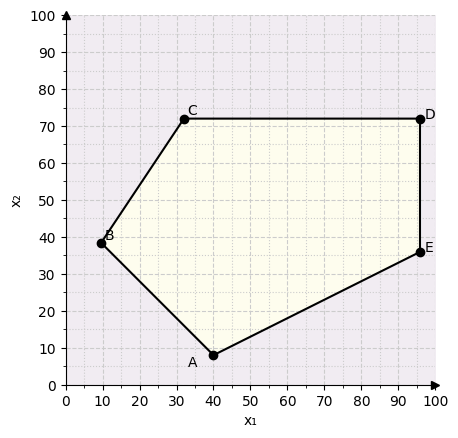

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
figure, axes = plt.subplots()
axes.set_xlim(xmin=0,xmax=100)
axes.set_ylim(ymin=0,ymax=100)
axes.spines[["left", "bottom"]].set_position(("data", 0))
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.plot(1, 0, ">k", transform=axes.get_yaxis_transform(), clip_on=False)
axes.plot(0, 1, "^k", transform=axes.get_xaxis_transform(), clip_on=False)
axes.xaxis.set_major_locator(MultipleLocator(10))
axes.yaxis.set_major_locator(MultipleLocator(10))
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.grid(which='major', color='#CCCCCC', linestyle='--')
axes.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.xlabel('x₁')
plt.ylabel('x₂')

d = np.linspace(0,100,3000)
x,y = np.meshgrid(d,d)

plt.imshow(((x+y>=48) & (x-2*y<=24) & (-3*x+2*y<=48) & (x >0) & (x<=96) & (y>0) & (y<=72)).astype(int),extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',alpha=0.075)
x = np.linspace(0,96,3000)

dy1 = 48 - x
dy2 = x/2 - 12
dy3 = 24 + 1.5*x
dy4 = (x*0)+72
dy5 = x-96

idx13 = np.argwhere(np.diff(np.sign(dy1 - dy3))).flatten()
idx12 = np.argwhere(np.diff(np.sign(dy1 - dy2))).flatten()
idx34 = np.argwhere(np.diff(np.sign(dy3 - dy4))).flatten()

plt.plot(x[int(idx13):int(idx12)],dy1[int(idx13):int(idx12)],color='k') # 48 -x
plt.plot(x[int(idx12):],dy2[int(idx12):],color='k') # x/2 -12
plt.plot(x[int(idx13):int(idx34)],dy3[int(idx13):int(idx34)],color='k') # 24+1.5*x
plt.plot(x[int(idx34):],dy4[int(idx34):],color='k') #y=72
plt.vlines(x=96,ymin=36,ymax=72,color='k')

plt.plot(x[idx12], dy2[idx12], 'ko')
plt.text(x[idx34]+1, dy2[idx34]+1,"A")

plt.plot(x[idx13], dy3[idx13], 'ko')
plt.text(x[idx13]+1, dy3[idx13]+1, "B")

plt.plot(x[idx34], dy4[idx34], 'ko')
plt.text(x[idx34]+1, dy4[idx34]+1,"C")

plt.plot(96, 72, 'ko')

plt.text(97, 72,"D")

plt.text(97, 36,"E")

plt.plot(96,36,'ko')

Получим градиент основного критерия f3 и линию уровня (перпендикуляр):

[1.0, -3.0]


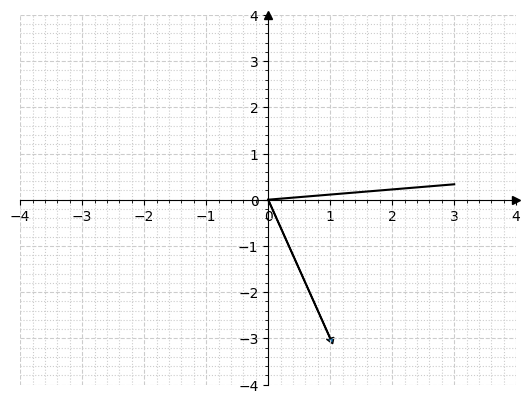

In [31]:
figure, axes = plt.subplots()
axes.set_xlim(xmin=-4,xmax=4)
axes.set_ylim(ymin=-4,ymax=4)
axes.spines[["left", "bottom"]].set_position(("data", 0))
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.plot(1, 0, ">k", transform=axes.get_yaxis_transform(), clip_on=False)
axes.plot(0, 1, "^k", transform=axes.get_xaxis_transform(), clip_on=False)
axes.xaxis.set_major_locator(MultipleLocator(1))
axes.yaxis.set_major_locator(MultipleLocator(1))
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
axes.grid(which='major', color='#CCCCCC', linestyle='--')
axes.grid(which='minor', color='#CCCCCC', linestyle=':')

x1,x2 = np.mgrid[0:96,-10:72]
f3 = x1 - 3*x2
Ex,Ey = np.gradient(f3)
grad = [Ex.mean(),Ey.mean()]
print(grad)

plt.plot([0,grad[0]],[0,grad[1]],label="Градиент",color='k')
plt.plot([0,grad[0]*3],[0,-1/grad[1]],label="Линия уровня",color='k')
plt.arrow(0,0,grad[0],grad[1],head_width=0.125,head_length=0.125)

Сместим линию уровня до пересечения с областью ограничений D~:

[[35.97999333]] [[60.02000667]]


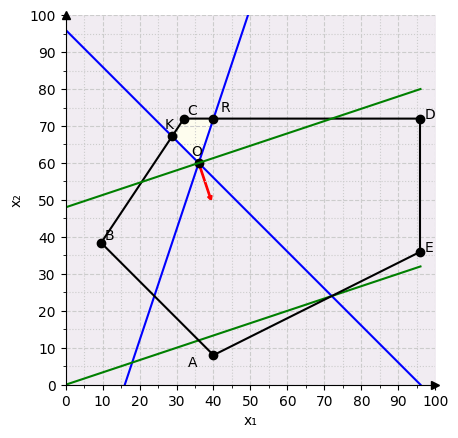

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
figure, axes = plt.subplots()
axes.set_xlim(xmin=0,xmax=100)
axes.set_ylim(ymin=0,ymax=100)
axes.spines[["left", "bottom"]].set_position(("data", 0))
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.plot(1, 0, ">k", transform=axes.get_yaxis_transform(), clip_on=False)
axes.plot(0, 1, "^k", transform=axes.get_xaxis_transform(), clip_on=False)
axes.xaxis.set_major_locator(MultipleLocator(10))
axes.yaxis.set_major_locator(MultipleLocator(10))
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.grid(which='major', color='#CCCCCC', linestyle='--')
axes.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.xlabel('x₁')
plt.ylabel('x₂')

d = np.linspace(0,100,3000)
x,y = np.meshgrid(d,d)

plt.imshow(((x+y>=48) & (x-2*y<=24) & (-3*x+2*y<=48) & (x >0) & (x<=96) & (y>0) & (y<=72) & (y>= 96 - x) & (y >= -48 + 3*x)).astype(int),extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',alpha=0.075)
x = np.linspace(0,96,3000)

dy1 = 48 - x
dy2 = x/2 - 12
dy3 = 24 + 1.5*x
dy4 = (x*0)+72
dy5 = x-96

l1 = 96 - x
l2 = -48+3*x

f3 = 1/3*x

plt.plot(x,l1,color='b')
plt.plot(x,l2,color='b')
plt.plot(x,f3,color='g')

idx13 = np.argwhere(np.diff(np.sign(dy1 - dy3))).flatten()
idx12 = np.argwhere(np.diff(np.sign(dy1 - dy2))).flatten()
idx34 = np.argwhere(np.diff(np.sign(dy3 - dy4))).flatten()

idxk = np.argwhere(np.diff(np.sign(l1-dy3)))
idxr = np.argwhere(np.diff(np.sign(l2-dy4)))

idxo = np.argwhere(np.diff(np.sign(l1-l2)))

plt.plot(x[idxk],l1[idxk],'ko')
plt.text(x[idxk]-2,l1[idxk]+2,'K')

plt.plot(x[idxr],l2[idxr],'ko')
plt.text(x[idxr]+2,l2[idxr]+2,'R')

plt.plot(x[idxo],l2[idxo],'ko')
plt.text(x[idxo]-2.125,l2[idxo]+2,'O')

plt.plot(x[int(idx13):int(idx12)],dy1[int(idx13):int(idx12)],color='k') # 48 -x
plt.plot(x[int(idx12):],dy2[int(idx12):],color='k') # x/2 -12
plt.plot(x[int(idx13):int(idx34)],dy3[int(idx13):int(idx34)],color='k') # 24+1.5*x
plt.plot(x[int(idx34):],dy4[int(idx34):],color='k') #y=72
plt.vlines(x=96,ymin=36,ymax=72,color='k')
plt.plot(96, 72, 'ko') #x=96


plt.plot(x[idx12], dy2[idx12], 'ko')
plt.text(x[idx34]+1, dy2[idx34]+1,"A")

plt.plot(x[idx13], dy3[idx13], 'ko')
plt.text(x[idx13]+1, dy3[idx13]+1, "B")

plt.plot(x[idx34], dy4[idx34], 'ko')
plt.text(x[idx34]+1, dy4[idx34]+1,"C")

plt.plot(96,36,'ko')
plt.text(97, 72,"D")
plt.text(97, 36,"E")
f5 = (x/3)+48
plt.plot(x,f5,color='g')
#     print(np.argwhere(np.diff(np.sign(f5-l1[idxr]))),np.argwhere(np.diff(np.sign(f5-l2[idxo]))),np.argwhere(np.diff(np.sign(f5-l2[idxk]))),np.argwhere(np.diff(np.sign(f5-dy4[idx34]))))
#     print()

plt.arrow(36,60,3,-9,head_width=1.25,head_length=1.25,width=0.35,color='r')
print(x[idxo],l1[idxo])